## Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import NearestNeighbors
import math
import seaborn as sn

In [2]:
import random
from scipy import ndarray

In [3]:
%config InlineBackend.figure_format = 'svg'

In [4]:
palette = ['paleturquoise','c']

## Import dataset

In [5]:
from collections import Counter
from imblearn.datasets import fetch_datasets
data = fetch_datasets()['mammography']

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [6]:
data.data.shape

(11183, 6)

In [7]:
len(data.data)

11183

In [8]:
def unison_shuffled_copies(a, b):
    np.random.seed(5)##change seed 1,2,3,4,5
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [9]:
data.data,data.target=unison_shuffled_copies(data.data, data.target)

## Initializing Results list

## Creating label and feature matrices

In [10]:
labels=data.target
print(np.unique(labels, return_counts = 1))

(array([-1,  1], dtype=int64), array([10923,   260], dtype=int64))


In [11]:
features=data.data
features.shape

(11183, 6)

In [12]:
n_feat=len(features[1])

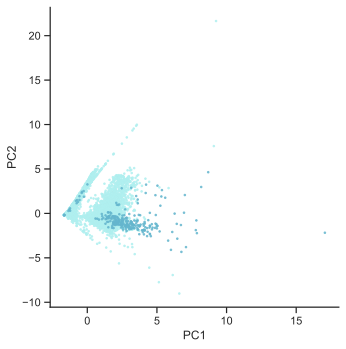

In [13]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
pc = pca.fit_transform(features)
result_baseline = pd.DataFrame(data = pc , 
        columns = ['PC1','PC2'])
result_baseline['Cluster'] = labels


sns.set(font_scale=1.2)
sns.set(rc={'figure.figsize':(12,10)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})


g_baseline=sns.lmplot( x="PC1", y="PC2",
  data=result_baseline, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=False,
  scatter_kws={"s": 3}, palette= sns.color_palette(palette) ) # specify the point size


plt.grid(False)
plt.show()

## Dividing data into training and testing datasets

In [14]:
label_1=np.where(labels == 1)[0]
label_1=list(label_1)
len(label_1)

260

In [15]:
features_1=features[label_1]
features_1=np.take(features_1,np.random.permutation(features_1.shape[0]),axis=0,out=features_1)

In [16]:
label_0=np.where(labels == -1)[0]
label_0=list(label_0)
len(label_0)

10923

In [17]:
features_0=features[label_0]
features_0=np.take(features_0,np.random.permutation(features_0.shape[0]),axis=0,out=features_0)

In [18]:
a=len(features_1)//10
b=len(features_0)//10

In [19]:
fold_1_min=features_1[0:a]
fold_1_maj=features_0[0:b]
fold_1_tst=np.concatenate((fold_1_min,fold_1_maj))
lab_1_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [20]:
fold_2_min=features_1[a:2*a]
fold_2_maj=features_0[b:2*b]
fold_2_tst=np.concatenate((fold_2_min,fold_2_maj))
lab_2_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [21]:
fold_3_min=features_1[2*a:3*a]
fold_3_maj=features_0[2*b:3*b]
fold_3_tst=np.concatenate((fold_3_min,fold_3_maj))
lab_3_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [22]:
fold_4_min=features_1[3*a:4*a]
fold_4_maj=features_0[3*b:4*b]
fold_4_tst=np.concatenate((fold_4_min,fold_4_maj))
lab_4_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [23]:
fold_5_min=features_1[4*a:5*a]
fold_5_maj=features_0[4*b:5*b]
fold_5_tst=np.concatenate((fold_5_min,fold_5_maj))
lab_5_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [24]:
fold_6_min=features_1[5*a:6*a]
fold_6_maj=features_0[5*b:6*b]
fold_6_tst=np.concatenate((fold_6_min,fold_6_maj))
lab_6_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [25]:
fold_7_min=features_1[6*a:7*a]
fold_7_maj=features_0[6*b:7*b]
fold_7_tst=np.concatenate((fold_7_min,fold_7_maj))
lab_7_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [26]:
fold_8_min=features_1[7*a:8*a]
fold_8_maj=features_0[7*b:8*b]
fold_8_tst=np.concatenate((fold_8_min,fold_8_maj))
lab_8_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [27]:
fold_9_min=features_1[8*a:9*a]
fold_9_maj=features_0[8*b:9*b]
fold_9_tst=np.concatenate((fold_9_min,fold_9_maj))
lab_9_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [28]:
fold_10_min=features_1[9*a:]
fold_10_maj=features_0[9*b:]
fold_10_tst=np.concatenate((fold_10_min,fold_10_maj))
lab_10_tst=np.concatenate((np.zeros(len(fold_10_min))+1, np.zeros(len(fold_10_maj))))

In [29]:
fold_1_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [30]:
lab_1_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [31]:
fold_2_trn=np.concatenate((fold_1_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_1_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [32]:
lab_2_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [33]:
fold_3_trn=np.concatenate((fold_2_min,fold_1_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_1_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [34]:
lab_3_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [35]:
fold_4_trn=np.concatenate((fold_2_min,fold_3_min,fold_1_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_1_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [36]:
lab_4_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [37]:
fold_5_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_1_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_1_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [38]:
lab_5_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [39]:
fold_6_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_1_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_1_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [40]:
lab_6_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [41]:
fold_7_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_1_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_1_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [42]:
lab_7_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [43]:
fold_8_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_1_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_1_maj,fold_9_maj,fold_10_maj))

In [44]:
lab_8_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [45]:
fold_9_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_1_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_1_maj,fold_10_maj))

In [46]:
lab_9_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [47]:
fold_10_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_1_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_1_maj))

In [48]:
lab_10_trn=np.concatenate((np.zeros(9*a)+1,np.zeros(9*b)))


In [49]:
training_folds_feats=[fold_1_trn,fold_2_trn,fold_3_trn,fold_4_trn,fold_5_trn,fold_6_trn,fold_7_trn,fold_8_trn,fold_9_trn,fold_10_trn]

In [50]:
testing_folds_feats=[fold_1_tst,fold_2_tst,fold_3_tst,fold_4_tst,fold_5_tst,fold_6_tst,fold_7_tst,fold_8_tst,fold_9_tst,fold_10_tst]

In [51]:
training_folds_labels=[lab_1_trn,lab_2_trn,lab_3_trn,lab_4_trn,lab_5_trn,lab_6_trn,lab_7_trn,lab_8_trn,lab_9_trn,lab_10_trn]

In [52]:
testing_folds_labels=[lab_1_tst,lab_2_tst,lab_3_tst,lab_4_tst,lab_5_tst,lab_6_tst,lab_7_tst,lab_8_tst,lab_9_tst,lab_10_tst]

In [53]:
def lr(X_train,y_train,X_test,y_test):
    from sklearn import metrics
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', class_weight={0: 1, 1: 1})
    logreg.fit(X_train, y_train)
    y_pred= logreg.predict(X_test)
    y_proba=logreg.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    aps=average_precision_score(y_test,y_proba)
    print('balanced accuracy_LR:', bal_acc)
    print('f1 score_LR:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_LR',con_mat)
    return(f1, bal_acc, aps, con_mat)

In [54]:
def svm(X_train,y_train,X_test,y_test):
    from sklearn import preprocessing
    from sklearn import metrics
    from sklearn import svm
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    X_train = preprocessing.scale(X_train)
    X_test = preprocessing.scale(X_test)
    svm= svm.SVC(kernel='linear', decision_function_shape='ovo', class_weight={0: 1., 1: 1.},probability=True)
    svm.fit(X_train, y_train)
    y_pred= svm.predict(X_test)
    y_proba=svm.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    aps=average_precision_score(y_test,y_proba)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    print('balanced accuracy_SVM:', bal_acc)
    print('f1 score_SVM:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_SVM',con_mat)
    return( f1, bal_acc , aps, con_mat)

In [55]:
def knn(X_train,y_train,X_test,y_test):
    from sklearn import metrics
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_train, y_train)
    y_pred= knn.predict(X_test)
    y_proba=knn.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    aps=average_precision_score(y_test,y_proba)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    print('balanced accuracy_KNN:', bal_acc)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    print('f1 score_KNN:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_KNN',con_mat)
    return(f1, bal_acc, aps, con_mat)

In [56]:
def Neb_grps(data,near_neb):
    nbrs = NearestNeighbors(n_neighbors=near_neb, algorithm='ball_tree').fit(data)
    distances, indices = nbrs.kneighbors(data)
    neb_class=[]
    for i in (indices):
        neb_class.append(i)
    return(np.asarray(neb_class)) 

def LoRAS(data,num_samples,shadow,sigma,num_RACOS,num_afcomb):
    np.random.seed(42)
    data_shadow=([])
    for i in range (num_samples):
        c=0
        while c<shadow:
            data_shadow.append(data[i]+np.random.normal(0,sigma))
            c=c+1
    data_shadow==np.asarray(data_shadow)
    data_shadow_lc=([])
    for i in range(num_RACOS):
        idx = np.random.randint(shadow*num_samples, size=num_afcomb)
        w=np.random.randint(100, size=len(idx))
        aff_w=np.asarray(w/sum(w))
        data_tsl=np.array(data_shadow)[idx,:]
        data_tsl_=np.dot(aff_w, data_tsl)
        data_shadow_lc.append(data_tsl_)
    return(np.asarray(data_shadow_lc))   

def LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb):
    RACOS_set=[]
    for i in range (len(nb_list)):
        RACOS_i= LoRAS(features_1_trn[nb_list[i]],num_samples,shadow,sigma,num_RACOS,num_afcomb)
        RACOS_set.append(RACOS_i)
    LoRAS_set=np.asarray(RACOS_set)
    LoRAS_1=np.reshape(LoRAS_set,(len(features_1_trn)*num_RACOS,n_feat))
    return(np.concatenate((LoRAS_1,features_1_trn)))

In [57]:
LR_tLoRAS=[]
SVM_tLoRAS=[]
KNN_tLoRAS=[]
import umap.umap_ as umap
for i in range(10):
    
    features = training_folds_feats[i]
    labels= training_folds_labels[i]
    label_1=np.where(labels == 1)[0]
    label_1=list(label_1)
    features_1_trn=features[label_1]
    
    label_0=np.where(labels == 0)[0]
    label_0=list(label_0)
    features_0_trn=features[label_0]
    
    data_embedded_min = umap.UMAP(n_neighbors=5, min_dist=0.00000001, n_components=2, metric='euclidean', random_state=11).fit_transform(features_1_trn)
    result_min= pd.DataFrame(data = data_embedded_min, columns = ['UMAP0', 'UMAP1'])
    min_t=np.asmatrix(result_min)
    min_t=min_t[0:len(features_1_trn)]
    min_t=min_t[:, [0,1]]
    
    num_samples=30
    shadow=100
    sigma=.005
    num_RACOS=(len(features_0_trn)-len(features_1_trn))//len(features_1_trn)
    num_afcomb=7
    nb_list=Neb_grps(min_t, num_samples)
    
    LoRAS_1=LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb)
    LoRAS_train=np.concatenate((LoRAS_1,features_0_trn))
    LoRAS_labels=np.concatenate((np.zeros(len(LoRAS_1))+1, np.zeros(len(features_0_trn))))
    
    f1_lr_LoRAS,bal_acc_lr_LoRAS, aps_lr_LoRAS,mat_lr_LoRAS=lr(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    LR_tLoRAS.append([f1_lr_LoRAS,bal_acc_lr_LoRAS,aps_lr_LoRAS])
    f1_svm_LoRAS,bal_acc_svm_LoRAS,aps_svm_LoRAS,mat_svm_LoRAS=svm(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    SVM_tLoRAS.append([f1_svm_LoRAS,bal_acc_svm_LoRAS,aps_svm_LoRAS])
    f1_knn_LoRAS,bal_acc_knn_LoRAS,aps_knn_LoRAS,mat_knn_LoRAS=knn(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    KNN_tLoRAS.append([f1_knn_LoRAS,bal_acc_knn_LoRAS,aps_knn_LoRAS])    

C:\Users\admin\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


tn, fp, fn, tp: 1012 80 5 21
balanced accuracy_LR: 0.8672161172161172
f1 score_LR: 0.33070866141732286
kappa: 0.30500095075109335
average_precision_score: 0.6721263963575996
confusion matrix_LR [[1012   80]
 [   5   21]]
tn, fp, fn, tp: 682 410 1 25
balanced accuracy_SVM: 0.7930402930402931
f1 score_SVM: 0.10845986984815618
kappa: 0.06753548250936536
average_precision_score: 0.5793715906068646
confusion matrix_SVM [[682 410]
 [  1  25]]
tn, fp, fn, tp: 1068 24 5 21
balanced accuracy_KNN: 0.8928571428571428
f1 score_KNN: 0.5915492957746479
kappa: 0.5791427607154911
average_precision_score: 0.5061184210146501
confusion matrix_KNN [[1068   24]
 [   5   21]]


C:\Users\admin\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


tn, fp, fn, tp: 1006 86 4 22
balanced accuracy_LR: 0.8836996336996337
f1 score_LR: 0.3283582089552239
kappa: 0.30219978362783995
average_precision_score: 0.5140697482634821
confusion matrix_LR [[1006   86]
 [   4   22]]
tn, fp, fn, tp: 676 416 3 23
balanced accuracy_SVM: 0.7518315018315018
f1 score_SVM: 0.0989247311827957
kappa: 0.05754040905999891
average_precision_score: 0.5175824362567624
confusion matrix_SVM [[676 416]
 [  3  23]]
tn, fp, fn, tp: 1063 29 9 17
balanced accuracy_KNN: 0.8136446886446886
f1 score_KNN: 0.4722222222222222
kappa: 0.45605858854860193
average_precision_score: 0.47248737192889456
confusion matrix_KNN [[1063   29]
 [   9   17]]


C:\Users\admin\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


tn, fp, fn, tp: 1021 71 5 21
balanced accuracy_LR: 0.8713369963369964
f1 score_LR: 0.3559322033898305
kappa: 0.33169734151329244
average_precision_score: 0.5820138088798631
confusion matrix_LR [[1021   71]
 [   5   21]]
tn, fp, fn, tp: 653 439 3 23
balanced accuracy_SVM: 0.7413003663003663
f1 score_SVM: 0.09426229508196722
kappa: 0.05254237288135588
average_precision_score: 0.5553848746252358
confusion matrix_SVM [[653 439]
 [  3  23]]
tn, fp, fn, tp: 1066 26 5 21
balanced accuracy_KNN: 0.8919413919413919
f1 score_KNN: 0.5753424657534246
kappa: 0.5622331691297209
average_precision_score: 0.5041527169191594
confusion matrix_KNN [[1066   26]
 [   5   21]]


C:\Users\admin\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


tn, fp, fn, tp: 1016 76 7 19
balanced accuracy_LR: 0.8305860805860805
f1 score_LR: 0.3140495867768595
kappa: 0.28805106722521445
average_precision_score: 0.5586892254037744
confusion matrix_LR [[1016   76]
 [   7   19]]
tn, fp, fn, tp: 668 424 3 23
balanced accuracy_SVM: 0.7481684981684982
f1 score_SVM: 0.09725158562367864
kappa: 0.05574697865775258
average_precision_score: 0.5199104424218401
confusion matrix_SVM [[668 424]
 [  3  23]]
tn, fp, fn, tp: 1068 24 6 20
balanced accuracy_KNN: 0.8736263736263736
f1 score_KNN: 0.5714285714285714
kappa: 0.5585215605749486
average_precision_score: 0.5001254791058011
confusion matrix_KNN [[1068   24]
 [   6   20]]


C:\Users\admin\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


tn, fp, fn, tp: 1006 86 3 23
balanced accuracy_LR: 0.9029304029304028
f1 score_LR: 0.34074074074074073
kappa: 0.31501700375872554
average_precision_score: 0.5453485359494701
confusion matrix_LR [[1006   86]
 [   3   23]]
tn, fp, fn, tp: 667 425 2 24
balanced accuracy_SVM: 0.766941391941392
f1 score_SVM: 0.10105263157894737
kappa: 0.05971219337327793
average_precision_score: 0.43340655255482646
confusion matrix_SVM [[667 425]
 [  2  24]]
tn, fp, fn, tp: 1062 30 6 20
balanced accuracy_KNN: 0.8708791208791209
f1 score_KNN: 0.5263157894736842
kappa: 0.5113636363636365
average_precision_score: 0.47497504641104443
confusion matrix_KNN [[1062   30]
 [   6   20]]


C:\Users\admin\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


tn, fp, fn, tp: 1017 75 3 23
balanced accuracy_LR: 0.907967032967033
f1 score_LR: 0.37096774193548393
kappa: 0.34696261682243
average_precision_score: 0.7396119038936712
confusion matrix_LR [[1017   75]
 [   3   23]]
tn, fp, fn, tp: 660 432 2 24
balanced accuracy_SVM: 0.7637362637362637
f1 score_SVM: 0.09958506224066391
kappa: 0.05814070858988607
average_precision_score: 0.7539055679478845
confusion matrix_SVM [[660 432]
 [  2  24]]
tn, fp, fn, tp: 1055 37 4 22
balanced accuracy_KNN: 0.9061355311355311
f1 score_KNN: 0.5176470588235295
kappa: 0.5015549901046084
average_precision_score: 0.7189969653476043
confusion matrix_KNN [[1055   37]
 [   4   22]]


C:\Users\admin\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


tn, fp, fn, tp: 1008 84 8 18
balanced accuracy_LR: 0.8076923076923077
f1 score_LR: 0.28125
kappa: 0.2535849056603774
average_precision_score: 0.47528347105875296
confusion matrix_LR [[1008   84]
 [   8   18]]
tn, fp, fn, tp: 624 468 4 22
balanced accuracy_SVM: 0.7087912087912087
f1 score_SVM: 0.08527131782945735
kappa: 0.043002640513013835
average_precision_score: 0.4858720645600383
confusion matrix_SVM [[624 468]
 [  4  22]]
tn, fp, fn, tp: 1066 26 9 17
balanced accuracy_KNN: 0.815018315018315
f1 score_KNN: 0.49275362318840576
kappa: 0.4776119402985075
average_precision_score: 0.4835693646527326
confusion matrix_KNN [[1066   26]
 [   9   17]]


C:\Users\admin\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


tn, fp, fn, tp: 1011 81 3 23
balanced accuracy_LR: 0.9052197802197802
f1 score_LR: 0.3538461538461538
kappa: 0.3288740245261984
average_precision_score: 0.7837392048277472
confusion matrix_LR [[1011   81]
 [   3   23]]
tn, fp, fn, tp: 680 412 3 23
balanced accuracy_SVM: 0.7536630036630036
f1 score_SVM: 0.09978308026030369
kappa: 0.0584604020471694
average_precision_score: 0.6856298359427986
confusion matrix_SVM [[680 412]
 [  3  23]]
tn, fp, fn, tp: 1061 31 4 22
balanced accuracy_KNN: 0.9088827838827839
f1 score_KNN: 0.5569620253164558
kappa: 0.5426921908234579
average_precision_score: 0.6717053996580298
confusion matrix_KNN [[1061   31]
 [   4   22]]


C:\Users\admin\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


tn, fp, fn, tp: 1026 66 4 22
balanced accuracy_LR: 0.8928571428571428
f1 score_LR: 0.38596491228070173
kappa: 0.3630977570884468
average_precision_score: 0.5161380504945499
confusion matrix_LR [[1026   66]
 [   4   22]]
tn, fp, fn, tp: 658 434 0 26
balanced accuracy_SVM: 0.8012820512820513
f1 score_SVM: 0.10699588477366256
kappa: 0.06587245970567623
average_precision_score: 0.3499940083719195
confusion matrix_SVM [[658 434]
 [  0  26]]
tn, fp, fn, tp: 1076 16 5 21
balanced accuracy_KNN: 0.8965201465201466
f1 score_KNN: 0.6666666666666666
kappa: 0.6573055028462997
average_precision_score: 0.6388785548408644
confusion matrix_KNN [[1076   16]
 [   5   21]]


C:\Users\admin\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


tn, fp, fn, tp: 1034 61 4 22
balanced accuracy_LR: 0.8952230417983842
f1 score_LR: 0.4036697247706422
kappa: 0.3818346864846063
average_precision_score: 0.6671121046974803
confusion matrix_LR [[1034   61]
 [   4   22]]
tn, fp, fn, tp: 662 433 2 24
balanced accuracy_SVM: 0.7638215665612926
f1 score_SVM: 0.09937888198757765
kappa: 0.05803596437174385
average_precision_score: 0.5998798767780446
confusion matrix_SVM [[662 433]
 [  2  24]]
tn, fp, fn, tp: 1071 24 6 20
balanced accuracy_KNN: 0.8736564805057956
f1 score_KNN: 0.5714285714285714
kappa: 0.5585571394817674
average_precision_score: 0.5517759066508392
confusion matrix_KNN [[1071   24]
 [   6   20]]


In [58]:
def stats(arr):
    x=np.mean(np.asarray(arr), axis = 0)
    y=np.std(np.asarray(arr), axis = 0)
    return(x,y)

In [59]:

print('F1 Score |  Balanced Accuracy  |  Average precision score :: mean|sd')
print('Without Oversampling')


print('LoRAS-UMAP Oversampling')
LR_tLoRAS_m, LR_tLoRAS_sd=stats(LR_tLoRAS)
print('lr:',LR_tLoRAS_m, LR_tLoRAS_sd)
SVM_tLoRAS_m, SVM_tLoRAS_sd=stats(SVM_tLoRAS)
print('svm:',SVM_tLoRAS_m, SVM_tLoRAS_sd)
KNN_tLoRAS_m, KNN_tLoRAS_sd=stats(KNN_tLoRAS)
print('knn:',KNN_tLoRAS_m, KNN_tLoRAS_sd)

F1 Score |  Balanced Accuracy  |  Average precision score :: mean|sd
Without Oversampling
LoRAS-UMAP Oversampling
lr: [0.34654879 0.87647285 0.60541324] [0.03389644 0.0318417  0.09881939]
svm: [0.09909653 0.75925761 0.54809373] [0.00610432 0.02466979 0.11089697]
knn: [0.55423163 0.8743162  0.55227852] [0.05263236 0.03250345 0.08589984]


First save the notebook and then run the last cell to generate .html

In [61]:
!jupyter nbconvert --to html mammographyCV_UMAP.ipynb

[NbConvertApp] Converting notebook mammographyCV_UMAP.ipynb to html
[NbConvertApp] Writing 1989798 bytes to mammographyCV_UMAP.html
